<a href="https://colab.research.google.com/github/kayiwa/SBU_ML_CYBER/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ignore warnings because ugh!

In [1]:
# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

Import the libraries we will need

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fix the random seed
np.random.seed(7)
from collections import Counter
from sklearn.model_selection import train_test_split
# Make plots appear within the notebook
%matplotlib inline

Grab our data

In [3]:
dataset = pd.read_csv('Phishing_2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print the shape of our data

In [ ]:
dataset.shape

(11054, 32)

In [5]:
# the top 5
print(dataset.head(5))

   having_IP_Address  URL_Length  ...  Statistical_report  Result
0                 -1           1  ...                  -1      -1
1                  1           1  ...                   1      -1
2                  1           0  ...                  -1      -1
3                  1           0  ...                   1      -1
4                  1           0  ...                   1       1

[5 rows x 31 columns]


In [6]:
# the last 5
print(dataset.tail(5))

       having_IP_Address  URL_Length  ...  Statistical_report  Result
11050                  1          -1  ...                   1       1
11051                 -1           1  ...                   1      -1
11052                  1          -1  ...                   1      -1
11053                 -1          -1  ...                   1      -1
11054                 -1          -1  ...                  -1      -1

[5 rows x 31 columns]


In [7]:
# random 5
dataset.sample(5).T

,6838,6085,8240,173,6664
having_IP_Address,1,-1,1,-1,-1
URL_Length,-1,-1,-1,-1,-1
Shortining_Service,1,1,1,-1,-1
having_At_Symbol,1,1,-1,1,1
double_slash_redirecting,1,1,1,-1,-1
Prefix_Suffix,-1,-1,-1,1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,-1,-1,1,1
Domain_registeration_length,1,-1,-1,-1,1
Favicon,1,1,1,1,1


In [8]:
dataset.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [ ]:

# dataset.iloc[:,0: -1].count()
# dataset.iloc[:,29].unique()
# Counter(dataset.iloc[:,0:33])
# dataset.iloc[:,0].sum()
# dataset.iloc[:,0].mean()
# dataset.iloc[:,0].std()
# dataset.iloc[:,0].min()
# dataset.iloc[:,0].max()

In [ ]:
# dataset.count()
# dataset.nunique()


still need to make this more human or at least Francis readable

In [9]:
# our columns
dataset.columns.to_list()

['having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [10]:
dataset.transpose().iloc[:,0:-1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11014,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024,11025,11026,11027,11028,11029,11030,11031,11032,11033,11034,11035,11036,11037,11038,11039,11040,11041,11042,11043,11044,11045,11046,11047,11048,11049,11050,11051,11052,11053
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,-1,1,-1,1,-1
URL_Length,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,-1,-1,-1,1,1,0,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,-1,1,1,-1,1,1,-1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,-1,1,-1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,0,1,0,0,-1,0,1,-1,-1,-1,0,0,-1,1,1,0,0,-1,-1,-1,-1,-1,1,-1,0,-1,-1,-1,-1,0,...,1,1,-1,-1,0,-1,0,-1,-1,1,1,1,1,1,1,1,-1,1,0,1,-1,1,1,-1,-1,1,0,1,0,-1,1,1,1,1,-1,1,1,1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,1,-1,0,-1,1,0,1,0,1,1,1,1,-1,0,1,1,-1,1,1,1,1,1,1,1,0,-1,1,-1,1,-1,...,0,-1,1,-1,1,0,-1,-1,-1,1,1,1,1,1,1,-1,0,1,0,1,-1,1,1,-1,-1,-1,-1,1,1,0,-1,-1,1,-1,1,-1,1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1
Favicon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,-1,1,1,...,-1,1,1,-1,1,1,-1,-1,-1,1,1,-1,1,-1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,1,-1


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


From the above table, you can quickly how the values of the different columns are distributed in the dataset. What are the maximum and minimum values and what percentage of rows have a certain kind of value. For example, if you take a look at the third row in the above table, you will know that 25% of the total 11055 entries in the respective column has a value of -1. 

Added with the above information, you might also want to know about the data-types of the different columns and if there are any missing values present in the dataset or not.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

Although we can see that there are no missing values (since all the columns report that they have 11055 non-null entries) its worth investigating more to ensure the dataset does not suffer from the[ missing value problem.](https://www.kaggle.com/dansbecker/handling-missing-values)

find out how the different classes in the dataset are distributed. We will use the Counter class for that.

In [13]:
classes = Counter(dataset["Result"].values) # is it class or StatsReport
classes.most_common()

[(1, 6157), (-1, 4898)]

turn this into a nice dataset

In [14]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


Visualize this dataset

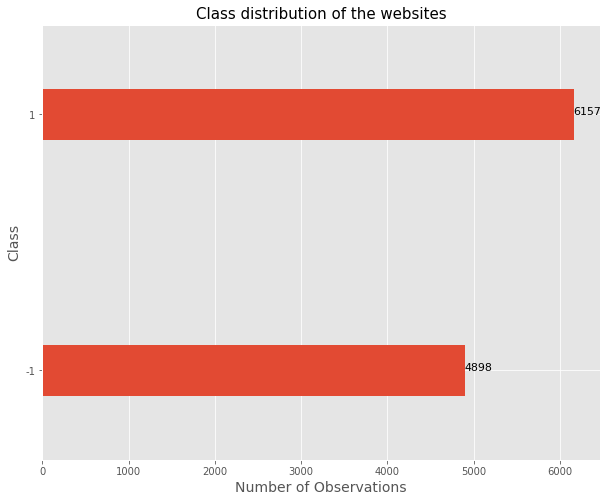

In [15]:
# Stylize the plots
plt.style.use("ggplot")

subplot = class_dist.groupby("Class")["Num_Observations"].sum().plot(kind="barh", width=0.2, figsize=(10,8))

subplot.set_title("Class distribution of the websites", fontsize = 15)
subplot.set_xlabel("Number of Observations", fontsize = 14)
subplot.set_ylabel("Class", fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

we will want to change the -1 values to 0 because negative values can effect model performance. In the next code blocks we try to take care of both of these issues.

In [16]:
print(dataset.apply(lambda col: col.unique()))

having_IP_Address                 [-1, 1]
URL_Length                     [1, 0, -1]
Shortining_Service                [1, -1]
having_At_Symbol                  [1, -1]
double_slash_redirecting          [-1, 1]
Prefix_Suffix                     [-1, 1]
having_Sub_Domain              [-1, 0, 1]
SSLfinal_State                 [-1, 1, 0]
Domain_registeration_length       [-1, 1]
Favicon                           [1, -1]
port                              [1, -1]
HTTPS_token                       [-1, 1]
Request_URL                       [1, -1]
URL_of_Anchor                  [-1, 0, 1]
Links_in_tags                  [1, -1, 0]
SFH                            [-1, 1, 0]
Submitting_to_email               [-1, 1]
Abnormal_URL                      [-1, 1]
Redirect                           [0, 1]
on_mouseover                      [1, -1]
RightClick                        [1, -1]
popUpWidnow                       [1, -1]
Iframe                            [1, -1]
age_of_domain                     

In [17]:
dataset.rename(columns={"Result": "Class"}, inplace=True)

dataset["Class"] = dataset["Class"].map({-1:0, 1:1})
dataset["Class"].unique()

array([0, 1])

In [18]:
dataset.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

We can see that the data does NOT have any missing values.

Let's also take a look at all of the distinct values for the columns to double-check the null analysis and see if there's any other possible weirdness with the data.

In [ ]:
# def summarize_dataset(dataset,column_name):
#    '''Output a dataframe containing the row count for each unique value 
#    in column column_name for dataframe dataset'''
#    distinct_values = dict(Counter(dataset[column_name]))
#    ds = pd.Series(distinct_values, name = 'Num_Observations')
#    ds.index.name = column_name
#    distinct_values = ds.reset_index()
#    return distinct_values

#Generate summary of all columns
# for column_name in dataset:
#    display(summarize_dataset(dataset,column_name))

In [19]:
X = dataset.iloc[:,0:30].values.astype(int)
y = dataset.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [20]:
# Serialize the numpy arrays
np.save("X_train.npy", X_train), np.save("y_train.npy", y_train)
np.save("X_test.npy", X_train), np.save("y_test.npy", y_train)
# Load the numpy arrays which will be our datasets from now
X_train, y_train = np.load("X_train.npy", allow_pickle=True), np.load("y_train.npy", allow_pickle=True)
X_test, y_test = np.load("X_test.npy", allow_pickle=True), np.load("y_test.npy", allow_pickle=True)


Accuracy score of the Logistic Regression Classifier with default hyperparameter values: 0.94
---- Classification report of the Logistic Regression Classifier with default hyperparameter values ---- 


In [21]:
# WandB the weights and biases library
%pip install wandb -q
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import wandb
import time

     |████████████████████████████████| 2.0MB 8.6MB/s 
     |████████████████████████████████| 163kB 39.4MB/s 
     |████████████████████████████████| 133kB 44.2MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 


In [22]:
# Execute simple Logistic Regression with default hyperparameter
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start = time.time()
logreg.fit(X_train, y_train)
end = time.time()-start
y_pred = logreg.predict(X_test)
print('Accuracy score of the Logistic Regression Classifier with default hyperparameter values: {:.2f}'.format(logreg.score(X_test, y_test)))
print('---- Classification report of the Logistic Regression Classifier with default hyperparameter values ---- ')
wandb.init(project="ml-capstone-project", name='Logistic Regression')
wandb.log({"accuracy":accuracy_score(y_test, y_pred)*100.0,\
               "precision": precision_recall_fscore_support(y_test, y_pred, average='macro')[0],
               "recall": precision_recall_fscore_support(y_test, y_pred, average='macro')[1],
               "training_time":end})
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Phising Websites', 'Normal Websites']))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy score of the Logistic Regression Classifier with default hyperparameter values: 0.92
---- Classification report of the Logistic Regression Classifier with default hyperparameter values ---- 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


                  precision    recall  f1-score   support

Phising Websites       0.93      0.90      0.91      3924
 Normal Websites       0.92      0.94      0.93      4920

        accuracy                           0.92      8844
       macro avg       0.92      0.92      0.92      8844
    weighted avg       0.92      0.92      0.92      8844

[[3541  383]
 [ 282 4638]]


In [23]:
def train_eval_pipeline(model, train_data, test_data, name):
    # Initialize Weights and Biases
    wandb.init(project="ml-capstone-project", name=name)
    
    # Segregate the datasets
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data
    
    # Train the model and log all the necessary metrics
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time() - start
    prediction = model.predict(X_test)

    wandb.log({"accuracy":accuracy_score(y_test, prediction)*100.0,\
               "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[0],
               "recall": precision_recall_fscore_support(y_test, prediction, average='macro')[1],
               "training_time":end})
    
    print("Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%"\
              .format(accuracy_score(y_test, prediction)*100.))
    print("\n")
    print("----Classification report of the Logistic Regression classifier with default hyperparameter value----")
    print("\n")
    print(classification_report(y_test, prediction, target_names=["Phishing Websites", "Normal Websites"]))

In [24]:
# Execute random search process based on Logistic Regression Classifier 
penalty = ['l1', 'l2']
C = [0.8, 0.9 , 1.0]
tol = [0.01, 0.001, 0.001]
max_iter = [100, 150, 200 , 250]
hyperparameters = { 'penalty' : penalty, 
                    'C' : C,
                    'tol' : tol,
                    'max_iter' : max_iter}
from sklearn.model_selection import RandomizedSearchCV
randomCV = RandomizedSearchCV(LogisticRegression(solver='liblinear'), param_distributions=hyperparameters)
start = time.time( )
randomCV.fit(X_train,y_train)
end = time.time()-start
wandb.init(project="ml-capstone-project", name='Random Search')
wandb.log({"accuracy":accuracy_score(y_test, y_pred)*100.0,\
               "precision": precision_recall_fscore_support(y_test, y_pred, average='macro')[0],
               "recall": precision_recall_fscore_support(y_test, y_pred, average='macro')[1],
               "training_time":end})
best_score = randomCV.best_score_
print('Best score: ','{:2.2f}'.format(best_score*100), ' using ', randomCV.best_params_ )
y_pred = randomCV.predict(X_test)

accuracy,92.48078
precision,0.92498
recall,0.92254
training_time,0.11886
_runtime,3
_timestamp,1614042209
_step,0


accuracy,▁
precision,▁
recall,▁
training_time,▁
_runtime,▁
_timestamp,▁
_step,▁


Best score:  92.44  using  {'tol': 0.001, 'penalty': 'l1', 'max_iter': 250, 'C': 1.0}


Can we improve this model? A good way to start approaching is to tune the hyperparameters of the model. We define a grid of values for the hyperparameters we would like to tune. We will use random search for hyperparameter tuning.

In [25]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# Define the grid of values
penalty = ["l1", "l2"]
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and the lists 
# of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

Now that we have defined the grid, let's use it to find a good set of hyperparameter values. https://blog.floydhub.com/guide-to-hyperparameters-search-for-deep-learning-models/


In [27]:
# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 92.41 using {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 200, 'C': 0.9}
